# Part I - Exploration des données de vol aux Etats-Unies

## Par Ibrahima Gaye

## Introduction
Dans ce projet nous allons étudier les données de trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco.

## Preliminary Wrangling


In [1]:
# importation de tous les packages nécessaire et parametrer l'affichage avec bibliothèque graphique intégrée à Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Chargement de l'ensemble de donnée dans un tableau pandas
df_bike = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df_bike.shape

(183412, 16)

In [4]:
#Affichage des cinq premières lignes
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Voir les informations sur les différentes colonnes du tableau
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Affichage de la describtion des variables numériques
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


le minimum de distance parcourue est de 61 secondes: il mérite plus d'être investigué

In [7]:
# Comptage du nombre de valeur manquante dans les différentes colonnes du tableau
df_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Comptage du nombre de ligne dupliquée
df_bike.duplicated().sum()

0

## Problème de qualité
> - Valeurs manquante sur les colonnes *start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year et member_gender*  
> - Type érroné des colonnes *start_time, end_time, start_station_id, end_station_id, member_birth_year*


## Nettoyage des données

**problème 1 :**  Valeurs manquante sur les colonnes start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year et member_gender

### Define

Supréssion de toutes les valeurs manquantes présentes dans le tableau

### Code

In [9]:
#Supression des valeurs manquantes avec la fonction .dropna() et appliquer sur place
df_bike.dropna(inplace= True)

### Test

In [10]:
# Vérification nombre de valeurs manquante présentes maintenant dans notre tableau.
df_bike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
df_bike.shape

(174952, 16)

**Problème 2 :** Type érroné des colonnes start_time, end_time, start_station_id, end_station_id, member_birth_year

### Define
- Modifier le type start_time et end_time en timestamp
- modifier le type de strt_station_id et end_station_id en int
- modifier le type de member_birth_year, member_gender, user_type en categoriel

la variable member_birth_year serade type categoriel ordoné du plus ancien au plus récent.

### Code

In [12]:
# Modification du type de stat_time et end_time en timestamp
df_bike.start_time = pd.to_datetime(df_bike.start_time)
df_bike.end_time = pd.to_datetime(df_bike.end_time)

In [13]:
# Modification du type de start_sttion_id et end_station_id en integer
df_bike.start_station_id = df_bike.start_station_id.astype(int)
df_bike.end_station_id = df_bike.end_station_id.astype(int)

In [14]:
years = np.sort(df_bike.member_birth_year.unique())

In [15]:
# Modifiction du type de la colonne member_birth_year en categoriel
df_bike.member_birth_year = pd.Categorical(df_bike.member_birth_year ,categories = years, ordered = True)
df_bike.member_gender = df_bike.member_gender.astype('category')
df_bike.user_type = df_bike.user_type.astype('category')


### Test

In [16]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> Notre ensemble de données contenait 183412 entrés et 14 caractéristiques, mais après néttoyage des valeurs null il y'a amitenant 174952 entrés. 
> les types des différentes caractéristiques sont constitués de 2 variables de type datetimes, 8 variables type numériques, 3 variables textes et 3 variables catégoriques dont 1 ordonée.
> la variable member_birth_year est ordonée suivant de la plus ancienne à la plus récente

### What is/are the main feature(s) of interest in your dataset?

> La caractéristique principale la plus à même d' être étudier est la **duration_sec**, il serait intéressant de déterminner quelles sont les facteurs qui influent sur la durée des trajets.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Je suppose que l'age des client qui emprunt les velos influe considérablement sur la durée des trajets, plus on est agé moins de temps onn reste à pédaler et plus on est jeune, plus a durée des trajets peut être longue. la distance et le genre peuvent aussi avoir un impacte sur la duréee des trajets.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

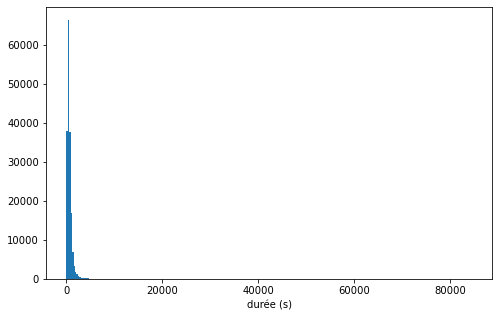

In [44]:
# Tracer Normale
bins = np.arange(0, df_bike.duration_sec.max()+ 300, 300)

plt.figure(figsize = [8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins = bins);

plt.xlabel('durée (s)');

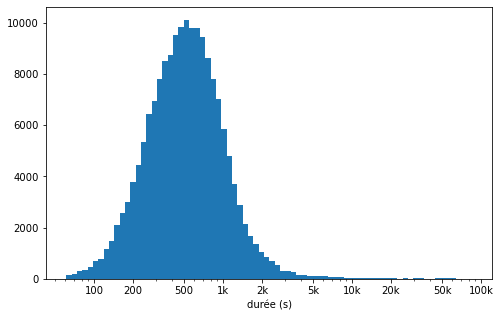

In [42]:
# Tracer d'un histogramme avec transformation logarithmique.

binSize = np.log10(1.1)
bins = 10**np.arange(np.log10(df_bike.duration_sec.min()), np.log10(df_bike.duration_sec.max())+binSize, binSize)

plt.figure(figsize = [8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins = bins);
plt.xscale('log')

plt.xticks([1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], ['100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('durée (s)');

la premiere graphique montre que la distribution de la durée (s) ce concentre sur de très petites durée alors que les durées dépassant les 20000 secondes ne contiennet presque pas de valeur. apres avoir effectuer une transformation logarithmique, on remarque que la distribution de la durée (duaration_sec) s'est transformée en une distribution normale unimodale, avec un pic aux alentoures des 500 secondes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

